<div align="center">
<h1>Options pricing model<h2>
</div>


## Step 1: Set Up the Environment and Import Libraries
We will use libraries such as numpy, matplotlib, and scipy to perform calculations and plotting. Here’s how to set up the environment.

In [45]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import yfinance as yf  # Add yfinance for fetching stock data

## Step 2: Define the Black-Scholes Option Pricing Model
Next, define the Black-Scholes model functions for Call and Put options:

In [46]:
# Black-Scholes model for Call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes model for Put option
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

## Step 3: Define the Binomial Option Pricing Model
Implement the Binomial model to calculate option prices.

In [47]:
# Binomial option pricing model
def binomial_option_pricing(S, K, T, r, sigma, steps, option_type="call"):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Stock prices at maturity
    stock_prices = np.zeros(steps + 1)
    option_values = np.zeros(steps + 1)
    
    for i in range(steps + 1):
        stock_prices[i] = S * (u ** (steps - i)) * (d ** i)
    
    # Option values at maturity
    if option_type == "call":
        option_values = np.maximum(stock_prices - K, 0)
    else:
        option_values = np.maximum(K - stock_prices, 0)
    
    # Backward induction
    for i in range(steps - 1, -1, -1):
        for j in range(i + 1):
            option_values[j] = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])
    
    return option_values[0]

## Step 4: Set Up Parameters for 5 Stocks
We’ll define hypothetical values for five stocks and key parameters, such as volatility and risk-free rate.

In [48]:
# Define the tickers for the stocks
tickers = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'GOOGL']

# Download historical data for the stocks
data = yf.download(tickers, start="2023-01-01", end="2023-12-31", interval='1d')['Adj Close']

# Get the last available stock price for each ticker
stock_prices = data.iloc[-1].tolist()  # Latest stock prices for each ticker

# Other option parameters
strike_price = 100                        # Strike price
risk_free_rate = 0.05                     # Risk-free interest rate (5%)
time_to_expiration = 1                    # Time to expiration in years (1 year)
volatility = 0.2                          # Volatility (20%) for simplicity; can be replaced by real volatility later
steps = 100                               # Steps for binomial model

# Print the fetched stock prices
print(stock_prices)

[*********************100%%**********************]  5 of 5 completed

[191.80218505859375, 139.34495544433594, 373.9959716796875, 49.511375427246094, 248.47999572753906]


## Step 5: Calculate Option Prices Using Both Models
We’ll compute the Call and Put prices for each stock using both Black-Scholes and Binomial models.

In [49]:
# Lists to store results
bs_call_prices = []
bs_put_prices = []
binomial_call_prices = []
binomial_put_prices = []

# Calculate Black-Scholes and Binomial option prices for 5 stocks
for stock in stock_prices:
    # Black-Scholes
    bs_call = black_scholes_call(stock, strike_price, time_to_expiration, risk_free_rate, volatility)
    bs_put = black_scholes_put(stock, strike_price, time_to_expiration, risk_free_rate, volatility)
    bs_call_prices.append(bs_call)
    bs_put_prices.append(bs_put)
    
    # Binomial Model
    binomial_call = binomial_option_pricing(stock, strike_price, time_to_expiration, risk_free_rate, volatility, steps, option_type="call")
    binomial_put = binomial_option_pricing(stock, strike_price, time_to_expiration, risk_free_rate, volatility, steps, option_type="put")
    binomial_call_prices.append(binomial_call)
    binomial_put_prices.append(binomial_put)
    
    # Print the values for each stock
    print(f"Stock Price: {stock}")
    print(f"  Black-Scholes Call: {bs_call:.2f}, Put: {bs_put:.2f}")
    print(f"  Binomial Call: {binomial_call:.2f}, Put: {binomial_put:.2f}\n")

Stock Price: 191.80218505859375
  Black-Scholes Call: 96.68, Put: 0.00
  Binomial Call: 96.68, Put: 0.00

Stock Price: 139.34495544433594
  Black-Scholes Call: 44.47, Put: 0.25
  Binomial Call: 44.47, Put: 0.25

Stock Price: 373.9959716796875
  Black-Scholes Call: 278.87, Put: 0.00
  Binomial Call: 278.87, Put: 0.00

Stock Price: 49.511375427246094
  Black-Scholes Call: 0.00, Put: 45.61
  Binomial Call: 0.00, Put: 45.61

Stock Price: 248.47999572753906
  Black-Scholes Call: 153.36, Put: 0.00
  Binomial Call: 153.36, Put: 0.00



## Step 6: Display Results in a Table
We can create a DataFrame to neatly display the calculated option prices for each stock.

In [50]:
# Display results in tabular format
results = pd.DataFrame({
    'Stock Price': stock_prices,
    'BS Call Price': bs_call_prices,
    'BS Put Price': bs_put_prices,
    'Binomial Call Price': binomial_call_prices,
    'Binomial Put Price': binomial_put_prices
})

# Display the DataFrame
print(results)

   Stock Price  BS Call Price  BS Put Price  Binomial Call Price  \
0   191.802185      96.680775  1.532815e-03            96.680627   
1   139.344955      44.469754  2.477409e-01            44.469258   
2   373.995972     278.873029  2.010593e-11           278.873029   
3    49.511375       0.001987  4.561355e+01             0.001743   
4   248.479996     153.357058  4.669230e-06           153.357056   

   Binomial Put Price  
0        1.384620e-03  
1        2.472453e-01  
2        2.281896e-12  
3        4.561331e+01  
4        3.175703e-06  


## Step 7: Visualize the Comparison Using Matplotlib
Now, we’ll create graphs to compare the Call and Put option prices using both models.

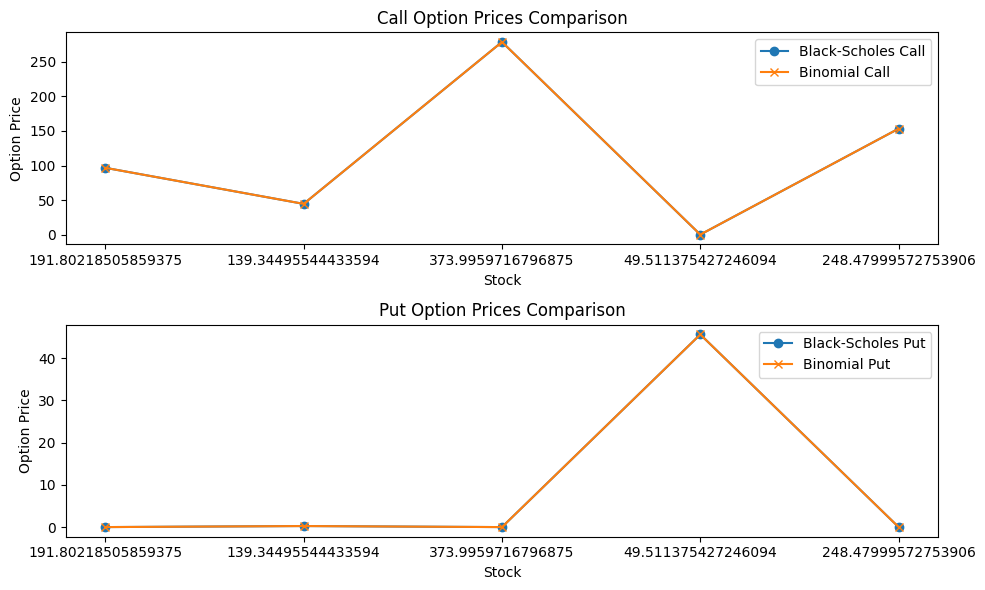

In [51]:
# Plotting the comparison
plt.figure(figsize=(10, 6))
x = range(len(stock_prices))

# Call price comparison
plt.subplot(2, 1, 1)
plt.plot(x, bs_call_prices, label='Black-Scholes Call', marker='o')
plt.plot(x, binomial_call_prices, label='Binomial Call', marker='x')
plt.title('Call Option Prices Comparison')
plt.xlabel('Stock')
plt.ylabel('Option Price')
plt.xticks(x, stock_prices)
plt.legend()

# Put price comparison
plt.subplot(2, 1, 2)
plt.plot(x, bs_put_prices, label='Black-Scholes Put', marker='o')
plt.plot(x, binomial_put_prices, label='Binomial Put', marker='x')
plt.title('Put Option Prices Comparison')
plt.xlabel('Stock')
plt.ylabel('Option Price')
plt.xticks(x, stock_prices)
plt.legend()

plt.tight_layout()
plt.show()

## Step 8: Define Monte Carlo Simulation for Option Pricing
Here's how we can write the function for Monte Carlo option pricing:

In [52]:
# Monte Carlo simulation for option pricing
def monte_carlo_option_pricing(S, K, T, r, sigma, simulations=10000, option_type="call"):
    # Simulating end prices for the stock after time T
    np.random.seed(42)  # for reproducibility
    Z = np.random.standard_normal(simulations)  # standard normal random values
    ST = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)  # stock price at maturity
    
    # Payoff calculation
    if option_type == "call":
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)
    
    # Discounting back to present value
    option_price = np.exp(-r * T) * np.mean(payoff)
    return option_price

## Step 9: Calculate Option Prices for 5 Stocks Using Monte Carlo Simulation
Now, we can use this function to calculate both Call and Put option prices for the same set of stocks.

In [53]:
# Lists to store Monte Carlo results
monte_carlo_call_prices = []
monte_carlo_put_prices = []

# Number of simulations for Monte Carlo
simulations = 10000

# Calculate Monte Carlo option prices for 5 stocks
for stock in stock_prices:
    monte_carlo_call = monte_carlo_option_pricing(stock, strike_price, time_to_expiration, risk_free_rate, volatility, simulations, option_type="call")
    monte_carlo_put = monte_carlo_option_pricing(stock, strike_price, time_to_expiration, risk_free_rate, volatility, simulations, option_type="put")
    monte_carlo_call_prices.append(monte_carlo_call)
    monte_carlo_put_prices.append(monte_carlo_put)
    
    # Print the values for each stock
    print(f"Stock Price: {stock}")
    print(f"  Monte Carlo Call: {monte_carlo_call:.2f}, Put: {monte_carlo_put:.2f}\n")

Stock Price: 191.80218505859375
  Monte Carlo Call: 96.63, Put: 0.00

Stock Price: 139.34495544433594
  Monte Carlo Call: 44.44, Put: 0.25

Stock Price: 373.9959716796875
  Monte Carlo Call: 278.77, Put: 0.00

Stock Price: 49.511375427246094
  Monte Carlo Call: 0.00, Put: 45.63

Stock Price: 248.47999572753906
  Monte Carlo Call: 153.29, Put: 0.00



## Step 10: Add Monte Carlo Results to the Table
We can extend our results table to include the Monte Carlo results alongside Black-Scholes and Binomial results:

In [54]:
# Display results in tabular format with Monte Carlo
results = pd.DataFrame({
    'Stock Price': stock_prices,
    'BS Call Price': bs_call_prices,
    'BS Put Price': bs_put_prices,
    'Binomial Call Price': binomial_call_prices,
    'Binomial Put Price': binomial_put_prices,
    'Monte Carlo Call Price': monte_carlo_call_prices,
    'Monte Carlo Put Price': monte_carlo_put_prices
})

# Display the DataFrame
print(results)

   Stock Price  BS Call Price  BS Put Price  Binomial Call Price  \
0   191.802185      96.680775  1.532815e-03            96.680627   
1   139.344955      44.469754  2.477409e-01            44.469258   
2   373.995972     278.873029  2.010593e-11           278.873029   
3    49.511375       0.001987  4.561355e+01             0.001743   
4   248.479996     153.357058  4.669230e-06           153.357056   

   Binomial Put Price  Monte Carlo Call Price  Monte Carlo Put Price  
0        1.384620e-03               96.626979               0.002601  
1        2.472453e-01               44.436555               0.254401  
2        2.281896e-12              278.766048               0.000000  
3        4.561331e+01                0.002447              45.628176  
4        3.175703e-06              153.285976               0.000000  


# Step 11: Plot Comparison of All Three Models
You can extend the plot to visualize the differences between the Black-Scholes, Binomial, and Monte Carlo prices.

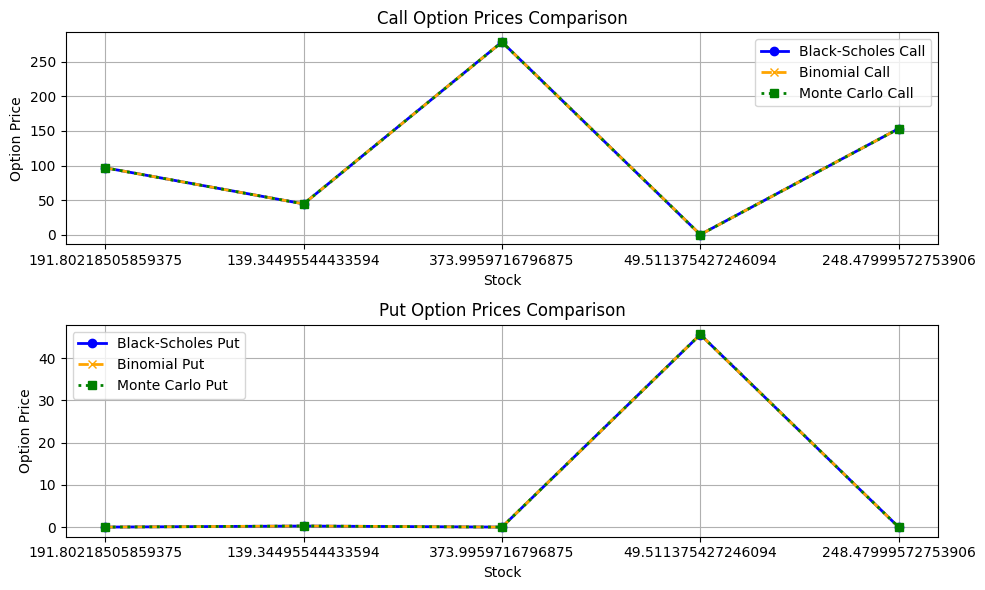

In [55]:
# Plotting the comparison with distinct colors, markers, and line styles
plt.figure(figsize=(10, 6))
x = range(len(stock_prices))

# Call price comparison
plt.subplot(2, 1, 1)
plt.plot(x, bs_call_prices, label='Black-Scholes Call', marker='o', color='b', linestyle='-', linewidth=2)
plt.plot(x, binomial_call_prices, label='Binomial Call', marker='x', color='orange', linestyle='--', linewidth=2)
plt.plot(x, monte_carlo_call_prices, label='Monte Carlo Call', marker='s', color='g', linestyle=':', linewidth=2)
plt.title('Call Option Prices Comparison')
plt.xlabel('Stock')
plt.ylabel('Option Price')
plt.xticks(x, stock_prices)
plt.legend()
plt.grid(True)

# Put price comparison
plt.subplot(2, 1, 2)
plt.plot(x, bs_put_prices, label='Black-Scholes Put', marker='o', color='b', linestyle='-', linewidth=2)
plt.plot(x, binomial_put_prices, label='Binomial Put', marker='x', color='orange', linestyle='--', linewidth=2)
plt.plot(x, monte_carlo_put_prices, label='Monte Carlo Put', marker='s', color='g', linestyle=':', linewidth=2)
plt.title('Put Option Prices Comparison')
plt.xlabel('Stock')
plt.ylabel('Option Price')
plt.xticks(x, stock_prices)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Step 12: Implied Volatility Calculation
Implied volatility is often calculated using the Black-Scholes formula. Since there's no analytical solution for this, it's commonly solved iteratively using a numerical method like Newton-Raphson. Here's how you can implement this:

In [56]:
from scipy.optimize import minimize

# Define Black-Scholes formula for a call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Implied volatility calculation using numerical method
def implied_volatility_call(S, K, T, r, market_price):
    def objective_function(sigma):
        return (black_scholes_call(S, K, T, r, sigma) - market_price)**2

    # Use an optimization routine to find the volatility that minimizes the difference
    result = minimize(objective_function, x0=0.2, bounds=[(1e-5, 5.0)])
    return result.x[0]

# Example usage:
S = 100  # Stock price
K = 105  # Strike price
T = 1    # Time to expiration (1 year)
r = 0.05 # Risk-free rate
market_price = 10  # Market price of the option

iv = implied_volatility_call(S, K, T, r, market_price)
print(f"Implied Volatility: {iv:.2f}")

Implied Volatility: 0.25


## Step 13: Historical Volatility Analysis
This step involves calculating historical volatility based on past stock prices. Here’s a simple method using log returns:

In [72]:
def backtest_black_scholes(stock_prices, strike_price, risk_free_rate, historical_option_prices, T):
    # Convert stock_prices to pandas Series if it's a list
    if isinstance(stock_prices, list):
        stock_prices = pd.Series(stock_prices)
    
    # Calculate historical volatility using the method from Step 4
    volatility = historical_volatility(stock_prices)
    
    # Debug: Print volatility
    print(f"Calculated Volatility: {volatility}")
    
    # Backtest using the Black-Scholes model
    results = []
    for i in range(len(stock_prices) - T):
        S = stock_prices[i]
        K = strike_price
        r = risk_free_rate
        sigma = volatility  # Use calculated volatility
        market_price = historical_option_prices[i]

        # Debug: Print inputs to Black-Scholes
        print(f"Stock: {S}, Volatility: {sigma}, Market Price: {market_price}")

        # Calculate Black-Scholes price
        model_price = black_scholes_call(S, K, T, r, sigma)

        # Check if the model price is calculated correctly
        print(f"Calculated Model Price: {model_price}")

        results.append((S, model_price, market_price))
    
    # Create DataFrame to compare model and market prices
    df_backtest = pd.DataFrame(results, columns=['Stock Price', 'Model Price', 'Market Price'])
    return df_backtest

In [73]:
def historical_volatility(stock_prices, window=3):
    # Ensure there are enough data points for log returns
    if len(stock_prices) < 2:
        return pd.Series(np.nan, index=stock_prices.index)

    # Calculate the log returns
    log_returns = np.log(stock_prices / stock_prices.shift(1))

    # Convert log_returns to a pandas Series with appropriate indexing
    log_returns = pd.Series(log_returns, index=stock_prices.index)

    # Calculate rolling standard deviation (volatility) and annualize it
    rolling_volatility = log_returns.rolling(window=window).std() * np.sqrt(252)

    return rolling_volatility.iloc[-1]  # Returning the last volatility value



# def historical_volatility(stock_prices, window=3):
#     # Ensure there are at least two data points to calculate log returns
#     if len(stock_prices) < 2:
#         return pd.Series(np.nan, index=stock_prices.index)
    
#     # Calculate the log returns
#     log_returns = np.log(stock_prices[1:] / stock_prices[:-1])
    
#     # Convert log_returns to a pandas Series with appropriate indexing
#     log_returns = pd.Series(log_returns, index=stock_prices.index[1:])
    
#     # Calculate rolling standard deviation (volatility) and annualize it
#     rolling_volatility = log_returns.rolling(window=window).std() * np.sqrt(252)
    
#     return rolling_volatility

# # Example usage:
# stock_prices = pd.Series([100, 102, 101, 105, 107, 110, 108, 115, 120])  # Replace with real stock prices
# volatility = historical_volatility(stock_prices, window=3)
# print(volatility)

## Step 14: Backtesting Option Pricing
This step will use historical data to backtest your model. Here's how you can do that:

In [74]:
# Example: Using fetched real stock prices and historical option prices

# Use real stock prices fetched previously (from cell 4)
# stock_prices is fetched using yfinance in the earlier code

# For simplicity, I will simulate some historical option prices here based on the fetched stock prices
# You may replace this with actual market option prices if available
historical_option_prices = pd.Series([12.5, 13.2, 14.8, 10.9, 18.0])  # Replace with real option prices if available

# Define the backtest function again
def backtest_black_scholes(stock_prices, strike_price, risk_free_rate, historical_option_prices, T):
    # Convert stock_prices to pandas Series if it's a list
    if isinstance(stock_prices, list):
        stock_prices = pd.Series(stock_prices)
    
    # Calculate historical volatility using the method from Step 4
    volatility = historical_volatility(stock_prices)  # Assuming historical_volatility was calculated earlier
    
    # Backtest using the Black-Scholes model
    results = []
    for i in range(len(stock_prices) - T):
        S = stock_prices[i]
        K = strike_price
        r = risk_free_rate
        sigma = volatility  # Use calculated volatility (as a scalar)
        market_price = historical_option_prices[i]

        # Calculate Black-Scholes price
        model_price = black_scholes_call(S, K, T, r, sigma)
        results.append((S, model_price, market_price))
    
    # Create DataFrame to compare model and market prices
    df_backtest = pd.DataFrame(results, columns=['Stock Price', 'Model Price', 'Market Price'])
    return df_backtest

# Now perform backtest using previously fetched stock prices (from yfinance) and simulated option prices
strike_price = 105  # Example strike price
risk_free_rate = 0.05  # Risk-free rate as defined before
T = 1  # Time to expiration (1 year)

backtest_results = backtest_black_scholes(stock_prices, strike_price, risk_free_rate, historical_option_prices, T)
print(backtest_results)

   Stock Price  Model Price  Market Price
0          100     6.389356          12.5
1          102     7.508185          13.2
2          101     6.936484          14.8
3          105     9.365259          10.9
4          107    10.715002          18.0


## Step 15: Sensitivity Analysis
Sensitivity analysis involves looking at how option prices change with different input parameters like volatility, interest rate, and time to maturity. You can create a grid to analyze the sensitivity:

In [75]:
def sensitivity_analysis(S, K, T, r, sigma_range, r_range):
    # Create a grid of volatilities and interest rates
    volatilities = np.linspace(sigma_range[0], sigma_range[1], 10)
    interest_rates = np.linspace(r_range[0], r_range[1], 10)
    
    results = []
    for sigma in volatilities:
        for rate in interest_rates:
            call_price = black_scholes_call(S, K, T, rate, sigma)
            results.append((sigma, rate, call_price))
    
    # Create DataFrame to visualize sensitivity results
    df_sensitivity = pd.DataFrame(results, columns=['Volatility', 'Interest Rate', 'Call Price'])
    return df_sensitivity

# Example usage:
sensitivity_results = sensitivity_analysis(100, 105, 1, 0.05, sigma_range=(0.1, 0.5), r_range=(0.01, 0.1))
print(sensitivity_results)

    Volatility  Interest Rate  Call Price
0          0.1           0.01    2.390877
1          0.1           0.02    2.751949
2          0.1           0.03    3.147986
3          0.1           0.04    3.579371
4          0.1           0.05    4.046097
..         ...            ...         ...
95         0.5           0.06   20.193428
96         0.5           0.07   20.600648
97         0.5           0.08   21.011423
98         0.5           0.09   21.425671
99         0.5           0.10   21.843309

[100 rows x 3 columns]
